In [1]:
a =[0, 0, 1, 1, 0, 0,
   0, 1, 0, 0, 1, 0,
   1, 1, 1, 1, 1, 1,
   1, 0, 0, 0, 0, 1,
   1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 1, 1, 1, 0]
 
# Creating labels
y =[[1, 0, 0],
   [0, 1, 0],
   [0, 0, 1]]

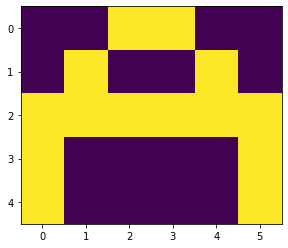

In [2]:

import numpy as np
import matplotlib.pyplot as plt
# visualizing the data, ploting A.
plt.imshow(np.array(a).reshape(5, 6))
plt.show()

In [13]:

# converting data and labels into numpy array
 
"""
Convert the matrix of 0 and 1 into one hot vector
so that we can directly feed it to the neural network,
these vectors are then stored in a list x.
"""
 
x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30),
                                np.array(c).reshape(1, 30)]
 
 
# Labels are also converted into NumPy array
y = np.array(y)
 
 
print(x, "\n\n", y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [18]:
# activation function
 
def sigmoid(x):
    return(1/(1 + np.exp(-x)))
   
# Creating the Feed forward neural network
# 1 Input layer(1, 30)
# 1 hidden layer (1, 5)
# 1 output layer(3, 3)
 
def f_forward(x, w1, w2):
    # hidden
    z1 = x.dot(w1)# input from layer 1
    a1 = sigmoid(z1)# out put of layer 2
     
    # Output layer
    z2 = a1.dot(w2)# input of out layer
    a2 = sigmoid(z2)# output of out layer
    return(a2)
  
# initializing the weights randomly
def generate_wt(x, y):
    l =[]
    for i in range(x * y):
        l.append(np.random.randn())
    return(np.array(l).reshape(x, y))
     
# for loss we will be using mean square error(MSE)
def loss(out, Y):
    s =(np.square(out-Y))
    s = np.sum(s)/len(y)
    return(s)
   
# Back propagation of error
def back_prop(x, y, w1, w2, alpha):
     
    # hidden layer
    z1 = x.dot(w1)# input from layer 1
    a1 = sigmoid(z1)# output of layer 2
     
    # Output layer
    z2 = a1.dot(w2)# input of out layer
    a2 = sigmoid(z2)# output of out layer
    # error in output layer
    d2 =(a2-y)
    d1 = np.multiply((w2.dot((d2.transpose()))).transpose(),
                                   (np.multiply(a1, 1-a1)))
 
    # Gradient for w1 and w2
    w1_adj = x.transpose().dot(d1)
    w2_adj = a1.transpose().dot(d2)
     
    # Updating parameters
    w1 = w1-(alpha*(w1_adj))
    w2 = w2-(alpha*(w2_adj))
     
    return(w1, w2)
 
def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
    acc =[]
    losss =[]
    for j in range(epoch):
        l =[]
        for i in range(len(x)):
            out = f_forward(x[i], w1, w2)
            l.append((loss(out, Y[i])))
            w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
        print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100)  
        acc.append((1-(sum(l)/len(x)))*100)
        losss.append(sum(l)/len(x))
    return(acc, losss, w1, w2)
  
def predict(x, w1, w2):
    Out = f_forward(x, w1, w2)
    maxm = 0
    k = 0
    for i in range(len(Out[0])):
        if(maxm<Out[0][i]):
            maxm = Out[0][i]
            k = i
    if(k == 0):
        print("Image is of letter A.")
    elif(k == 1):
        print("Image is of letter B.")
    else:
        print("Image is of letter C.")
    plt.imshow(x.reshape(5, 6))
    plt.show()   


In [19]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
print(w1, "\n\n", w2)

[[-0.80453998 -1.48689735  0.18197067  0.7072621  -0.24693647]
 [ 0.70922275 -1.27132977 -0.14238041  1.48255772  0.64455661]
 [ 2.09524358  1.38479249 -0.23790228  3.10254077  1.01678293]
 [-0.38291503 -0.29741962 -0.13192107  2.06021099 -0.76289104]
 [-0.29657528  1.15723231  0.18387266  1.53548764  0.02867138]
 [ 1.36581582  1.99586404 -0.34505215  0.46886153  0.28067312]
 [-0.98890381  1.31183288  0.1834548   1.0287113  -0.3021825 ]
 [-0.38677199  1.05749723  1.88240708 -1.56279505  1.2561779 ]
 [ 0.20037282  1.46440725  1.31693937  1.76328077  0.69916731]
 [-0.21563857 -0.39751803  0.05544817 -0.58845296 -0.27208091]
 [ 0.36884748 -0.4218867  -1.07545969  0.11847944  0.58821202]
 [ 0.58301994  0.72880002  1.20445877  0.79204346 -0.7344757 ]
 [-3.19897606 -0.55815968  0.98791622 -0.19720109  0.9292189 ]
 [ 0.28626886  0.96628318  1.10334676  1.01607149 -0.98814783]
 [-0.93922891  0.0501154   1.10614035  0.09393417 -0.0498389 ]
 [-0.4744402   0.10840035  1.21701205  0.42061039  1.52

In [20]:
"""The arguments of train function are data set list x,
correct labels y, weights w1, w2, learning rate = 0.1,
no of epochs or iteration.The function will return the
matrix of accuracy and loss and also the matrix of
trained weights w1, w2"""
 
acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)

epochs: 1 ======== acc: 60.91747601402282
epochs: 2 ======== acc: 62.21496887904521
epochs: 3 ======== acc: 63.755897371641666
epochs: 4 ======== acc: 65.93104401502828
epochs: 5 ======== acc: 68.98152900915026
epochs: 6 ======== acc: 72.59691211465163
epochs: 7 ======== acc: 75.9421390445653
epochs: 8 ======== acc: 78.41286932256023
epochs: 9 ======== acc: 80.00862715443265
epochs: 10 ======== acc: 81.0070122385211
epochs: 11 ======== acc: 81.65865918222714
epochs: 12 ======== acc: 82.11825792471232
epochs: 13 ======== acc: 82.46963784560897
epochs: 14 ======== acc: 82.75677225106122
epochs: 15 ======== acc: 83.00307496207445
epochs: 16 ======== acc: 83.22152586413935
epochs: 17 ======== acc: 83.4197110822551
epochs: 18 ======== acc: 83.60232100210783
epochs: 19 ======== acc: 83.77241592260742
epochs: 20 ======== acc: 83.93209216980745
epochs: 21 ======== acc: 84.08284931021322
epochs: 22 ======== acc: 84.22580254195779
epochs: 23 ======== acc: 84.36181113772057
epochs: 24 ======== ac

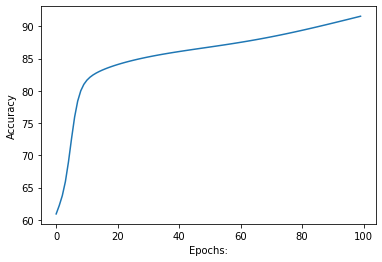

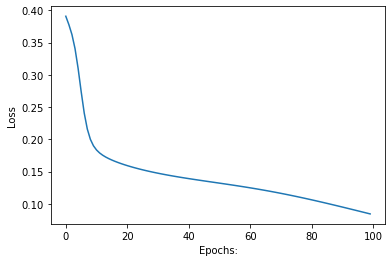

In [21]:

import matplotlib.pyplot as plt1
 
# ploting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()
 
# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()

In [22]:
print(w1, "\n", w2)

[[-0.80453998 -1.48689735  0.18197067  0.7072621  -0.24693647]
 [ 0.62198649 -1.57252572  0.43357081  1.47860599  0.75253271]
 [ 1.98827968  1.29326863 -0.14278895  3.11640974  1.08575379]
 [-0.48987893 -0.38894349 -0.03680774  2.07407995 -0.69392018]
 [-0.38381153  0.85603636  0.75982389  1.53153591  0.13664748]
 [ 1.36581582  1.99586404 -0.34505215  0.46886153  0.28067312]
 [-0.98890381  1.31183288  0.1834548   1.0287113  -0.3021825 ]
 [-0.4937359   0.96597337  1.97752041 -1.54892609  1.32514876]
 [ 0.20037282  1.46440725  1.31693937  1.76328077  0.69916731]
 [-0.21563857 -0.39751803  0.05544817 -0.58845296 -0.27208091]
 [-0.2674584  -0.28871792 -1.18135208  0.13955811  0.43540085]
 [ 0.58301994  0.72880002  1.20445877  0.79204346 -0.7344757 ]
 [-3.21870371 -0.34848758  0.50707833 -0.17938039  0.89021366]
 [ 0.17930496  0.87475932  1.1984601   1.02994045 -0.91917697]
 [-1.57553479  0.18328418  1.00024796  0.11501283 -0.20265006]
 [-1.11074608  0.24156912  1.11111966  0.44168905  1.37

Image is of letter B.


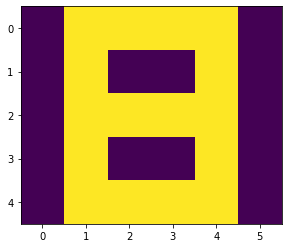

In [23]:

"""
The predict function will take the following arguments:
1) image matrix
2) w1 trained weights
3) w2 trained weights
"""
predict(x[1], w1, w2)